# Business Understanding 
- predict churn 
- classification 
- the data set includes information about:
<ol>
<li>Customers who left within the last month </li>
<li>Services that each customer has signed up for</li>
<li>Customer account information</li>
<li>Demographic info about customers</li>
</ol>


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# printing the columns and their unique values
for col in df.columns:
    print (F"{col}  : {len(df[col].unique())}  \n {df[col].unique()} \n")

customerID  : 7043  
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender  : 2  
 ['Female' 'Male'] 

SeniorCitizen  : 2  
 [0 1] 

Partner  : 2  
 ['Yes' 'No'] 

Dependents  : 2  
 ['No' 'Yes'] 

tenure  : 73  
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService  : 2  
 ['No' 'Yes'] 

MultipleLines  : 3  
 ['No phone service' 'No' 'Yes'] 

InternetService  : 3  
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  : 3  
 ['No' 'Yes' 'No internet service'] 

OnlineBackup  : 3  
 ['Yes' 'No' 'No internet service'] 

DeviceProtection  : 3  
 ['No' 'Yes' 'No internet service'] 

TechSupport  : 3  
 ['No' 'Yes' 'No internet service'] 

StreamingTV  : 3  
 ['No' 'Yes' 'No internet service'] 

StreamingMovies  : 3  
 ['No' 'Yes' 'No internet service'] 

Contract  : 3  
 ['

In [6]:
# getting general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Visualize Data

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='gender'>

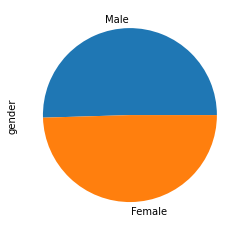

In [9]:
# checking the number of female and males
df['gender'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SeniorCitizen'>

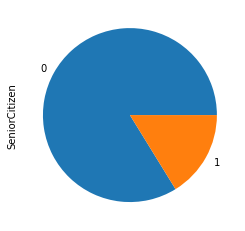

In [10]:
# checking the number of Senior Citizen
df['SeniorCitizen'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Churn'>

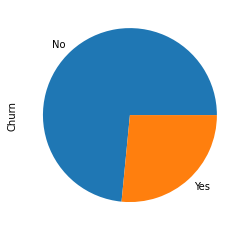

In [11]:
# checking the number of churn vs no churn
# impalnced data for the target
df['Churn'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'MonthlyCharges for males\n')

<Figure size 1152x504 with 0 Axes>

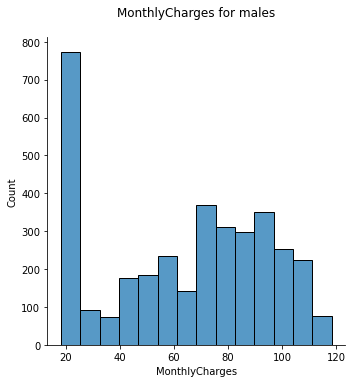

In [12]:
plt.figure(figsize=(16,7))
sns.displot(df[df['gender']=='Male']['MonthlyCharges'],kde=False)
plt.title('MonthlyCharges for males\n')

Text(0.5, 1.0, 'MonthlyCharges for Females\n')

<Figure size 1152x504 with 0 Axes>

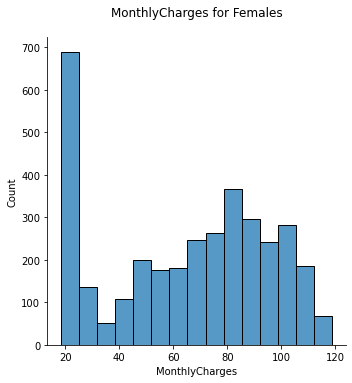

In [13]:
plt.figure(figsize=(16,7))
sns.displot(df[df['gender']=='Female']['MonthlyCharges'],kde=False)
plt.title('MonthlyCharges for Females\n')

# Data Preparation

In [14]:
# droping the customerID columns
df.drop('customerID',axis=1,inplace=True)

In [15]:
# changing the TotalCharges because when i did df.info() i fount out that TotalCharges is an object 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [16]:
# normalizing the data
from sklearn import preprocessing



numeric_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_numeric_feats = pd.DataFrame(df, columns = numeric_feats)
df_categ_feats = df.drop(columns = numeric_feats)


min_max_scaler = preprocessing.MinMaxScaler()
normalized_numeric_feats = min_max_scaler.fit_transform(df_numeric_feats)
normalized_numeric_feats = pd.DataFrame(normalized_numeric_feats, columns = numeric_feats, index=df_categ_feats.index)



In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
df_numeric_norm = pd.concat([df_categ_feats, normalized_numeric_feats], axis=1)

In [19]:
# defining the ame of the columns that we will normalize
columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [20]:
# encoding the data 
for col in columns:
    df_numeric_norm[col]= label_encoder.fit_transform(df_numeric_norm[col])
    

In [21]:
# droping null values
df_numeric_norm =df_numeric_norm.dropna()

In [22]:
# checking the importance of the features
from sklearn.ensemble import RandomForestClassifier
df = df_numeric_norm.dropna()
X = df_numeric_norm.drop('Churn',axis=1)
y = df_numeric_norm.Churn
model = RandomForestClassifier()
model.fit(X,y)

print(model.feature_importances_)


[0.02844633 0.02042743 0.02229998 0.01968812 0.00480511 0.02290142
 0.02913806 0.04973246 0.02461489 0.02308589 0.04709207 0.01722696
 0.01773361 0.07181092 0.02596216 0.05205898 0.15654558 0.17406166
 0.19236836]


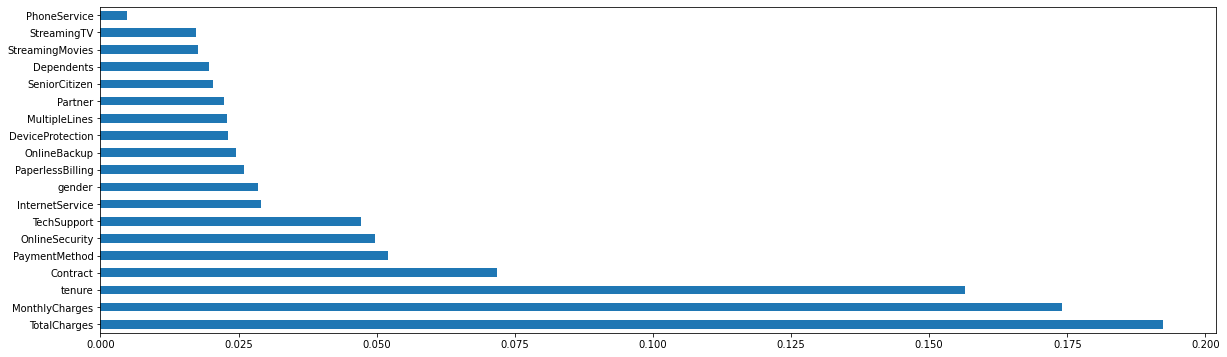

In [23]:
# ploting  feature importances
from matplotlib import pyplot as plt
plt.figure(figsize=(20,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [24]:
# droping the useless features
data1 = df_numeric_norm.drop(columns=['PhoneService','StreamingTV','StreamingMovies','Dependents','SeniorCitizen','MultipleLines','Partner','PaperlessBilling','DeviceProtection','OnlineBackup','InternetService','gender','OnlineSecurity','PaymentMethod','TechSupport','OnlineSecurity','PaymentMethod'])

In [25]:
# defining the features and target
x1 = data1.drop('Churn',axis= 1)
y1 = data1['Churn']

In [26]:
# fixing the imbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x1, y1)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [27]:
# spliting put data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# Modelling 

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
# defining the hypergrid 
hypergrid ={
   

    'knn':{
        'kneighborsclassifier__n_neighbors': np.arange(27, 30),
        'kneighborsclassifier__leaf_size' : list(range(1,50)),
       'kneighborsclassifier__p':[1,2],
        'kneighborsclassifier__weights' : ['uniform','distance'],
        'kneighborsclassifier__metric' : ['minkowski','euclidean','manhattan']
         
    },
    'lr':{
        'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none'],
        'logisticregression__C': np.arange(.5, 10, .5),
        'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'logisticregression__class_weight' :['dict' , 'balanced', 'None'],
        'logisticregression__max_iter' : [100, 1000,2500, 5000]
    },
    
  'rf':  {
'randomforestclassifier__n_estimators':[5,20,50,100] ,
'randomforestclassifier__max_features' : ['auto', 'sqrt'], 
'randomforestclassifier__max_depth' :[int(x) for x in np.linspace(10, 120, num = 12)] ,
'randomforestclassifier__min_samples_split' : [2, 6, 10], 
'randomforestclassifier__min_samples_leaf' : [1, 3, 4],
'randomforestclassifier__bootstrap' : [True, False],
  },
    'xgb' :   {
    'xgbclassifier__learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
    }
        
}

In [30]:
# defining the pipelines
pipelines = {
    
      
        'knn':make_pipeline(KNeighborsClassifier()),
 'lr':make_pipeline(LogisticRegression()),
    'rf':make_pipeline(RandomForestClassifier()),
    'xgb':make_pipeline(XGBClassifier())
        
}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

import warnings
warnings.filterwarnings('ignore')

In [32]:
fit_model ={}
for algo ,pipeline in pipelines.items():
        #finding the best hyperparameters for our model
        model= GridSearchCV(pipeline,hypergrid[algo],cv=3,n_jobs=5)
        try:
            print('Starting training for {}'.format(algo))
            # fitting the model
            model.fit(X_train,y_train)
            #puttin the model in fit_model[]
            fit_model[algo]=model
            print('{} has been successfully fit'.format(algo))
        except NotFittedError as e:
            print(report(e))
            

Starting training for knn
knn has been successfully fit
Starting training for lr
lr has been successfully fit
Starting training for rf
rf has been successfully fit
Starting training for xgb
[11:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb has been successfully fit


# Evaluation 

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

for algo,model in fit_model.items():
    yhat = model.predict(X_test)
    print(algo,classification_report(y_test,   yhat),'\n')
    print("------------------------------------------------")

knn               precision    recall  f1-score   support

           0       0.85      0.74      0.79      1033
           1       0.77      0.87      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066
 

------------------------------------------------
lr               precision    recall  f1-score   support

           0       0.80      0.68      0.74      1033
           1       0.72      0.83      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.75      2066
weighted avg       0.76      0.76      0.75      2066
 

------------------------------------------------
rf               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.79      0.82      0.81      1033

    accuracy                           0.80      2066
   macro avg    

# Saving and Loading the model 

In [34]:
import pickle

In [35]:
best_model = fit_model['rf']

In [36]:
pickle.dump(best_model, open("trained_model/model.h", 'wb'))

In [37]:
loaded_model = pickle.load(open("trained_model/model.h", 'rb'))